In [1]:
!wget https://bcolabcourses.github.io/ISIfall2024/static_files/assignments/2016-general-election-trump-vs-clinton.csv

--2024-11-07 07:28:56--  https://bcolabcourses.github.io/ISIfall2024/static_files/assignments/2016-general-election-trump-vs-clinton.csv
Resolving bcolabcourses.github.io (bcolabcourses.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to bcolabcourses.github.io (bcolabcourses.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 557274 (544K) [text/csv]
Saving to: ‘2016-general-election-trump-vs-clinton.csv’

2016-general-electi 100%[===================>] 544.21K  --.-KB/s    in 0.05s   

2024-11-07 07:28:56 (10.9 MB/s) - ‘2016-general-election-trump-vs-clinton.csv’ saved [557274/557274]



In [2]:
import pandas as pd

df = pd.read_csv('2016-general-election-trump-vs-clinton.csv')

df.shape

(1522, 17)

In [3]:
original_df = pd.read_csv('2016-general-election-trump-vs-clinton.csv')
original_df = original_df.dropna(subset=['Number of Observations'])

In [4]:
df.isna().sum()

,0
Pollster,0
Start Date,0
End Date,0
Entry Date/Time (ET),0
Number of Observations,509
Population,0
Mode,0
Trump,0
Clinton,0
Other,424


In [5]:
df = df.dropna(subset=['Number of Observations'])

df.shape

(1013, 17)

In [6]:
df = df.drop(['Pollster URL','Source URL','Partisan','Question Text','Question Iteration'],axis=1)

df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Affiliation
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,NaN
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,NaN
5,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,3669.0,Likely Voters,Internet,41.0,45.0,5.0,4.0,NaN
6,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1392.0,Likely Voters - Democrat,Internet,6.0,90.0,2.0,2.0,NaN
7,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1110.0,Likely Voters - Republican,Internet,84.0,4.0,4.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1516,YouGov/Economist,2015-06-20,2015-06-22,2015-06-26T01:02:40Z,235.0,Registered Voters - Republican,Internet,65.0,12.0,NaN,24.0,NaN
1517,YouGov/Economist,2015-06-20,2015-06-22,2015-06-26T01:02:40Z,266.0,Registered Voters - independent,Internet,34.0,45.0,NaN,21.0,NaN
1518,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,1711.0,Registered Voters,Live Phone,32.0,50.0,3.0,14.0,NaN
1519,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,748.0,Registered Voters - Democrat,Live Phone,5.0,89.0,0.0,5.0,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1013 entries, 0 to 1520
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1013 non-null   object 
 1   Start Date              1013 non-null   object 
 2   End Date                1013 non-null   object 
 3   Entry Date/Time (ET)    1013 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1013 non-null   object 
 6   Mode                    1013 non-null   object 
 7   Trump                   1013 non-null   float64
 8   Clinton                 1013 non-null   float64
 9   Other                   640 non-null    float64
 10  Undecided               979 non-null    float64
 11  Affiliation             44 non-null     object 
dtypes: float64(5), object(7)
memory usage: 135.2+ KB


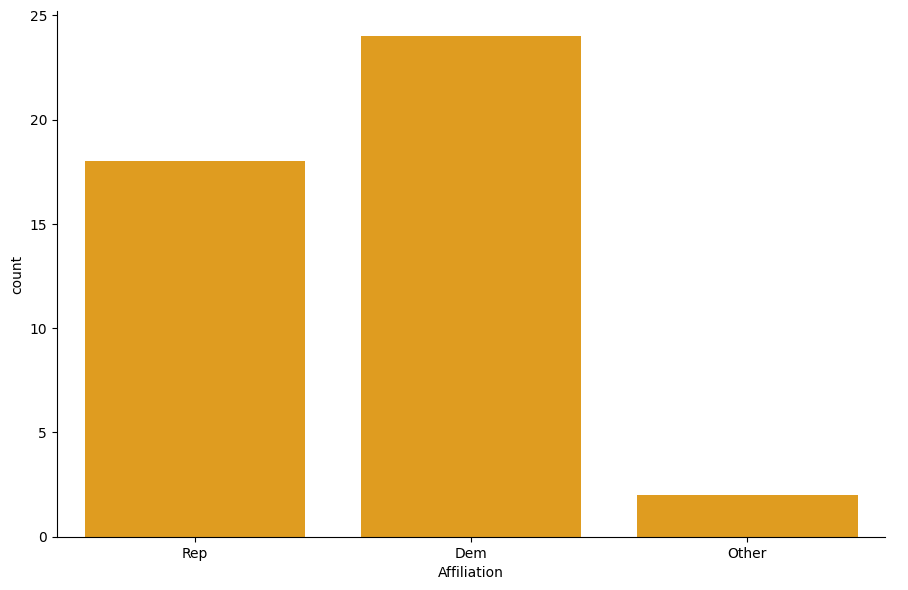

In [8]:
# Quick visualization overview of the affiliation for the polls
import seaborn as sns

sns.catplot(x='Affiliation', data=df, kind='count', color='orange', height=6, aspect=1.5)

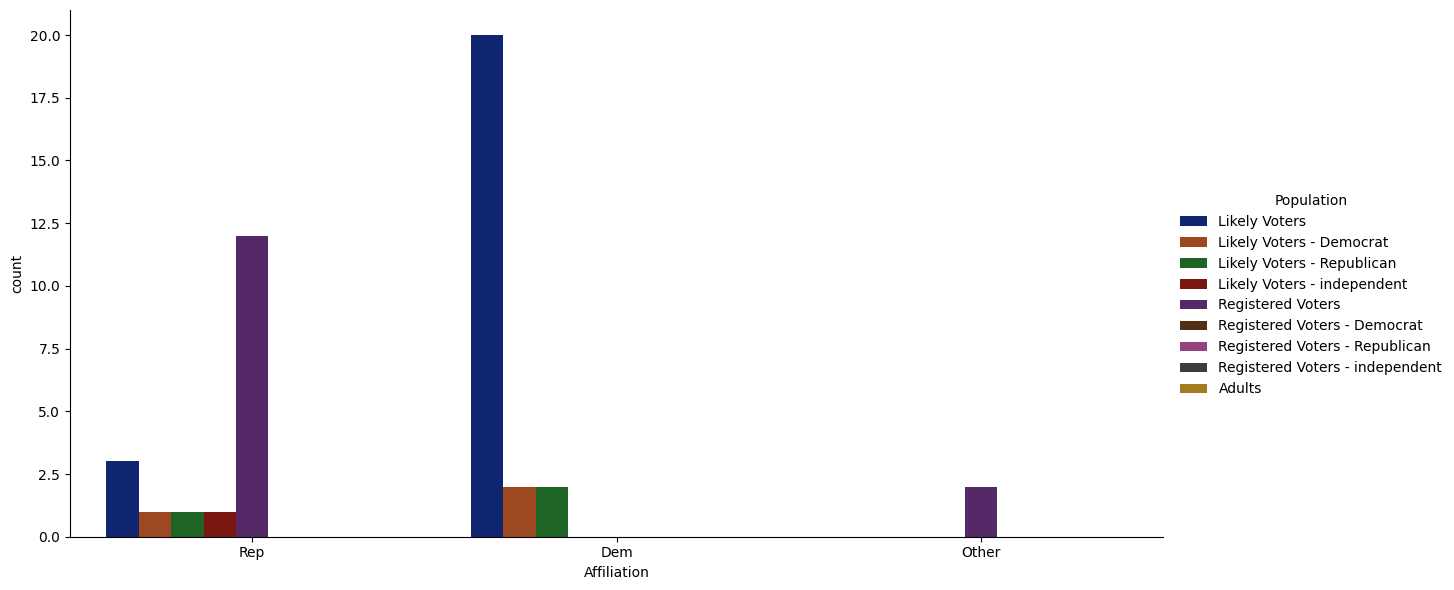

In [9]:
sns.catplot(x='Affiliation', data=df, kind='count', legend=True, hue='Population', height=6, aspect=2, palette='dark')

In [10]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_columns)

Numeric columns: Index(['Number of Observations', 'Trump', 'Clinton', 'Other', 'Undecided'], dtype='object')


In [11]:
average = pd.DataFrame(df[numeric_columns].mean())

if 'Number of Observations' in average.index:
    average.drop('Number of Observations', inplace=True)

print(average)

                   0
Trump      40.403751
Clinton    43.537019
Other       5.079688
Undecided   9.948927


In [12]:
std = pd.DataFrame(df[numeric_columns].std())

if 'Number of Observations' in std.index:
    std.drop('Number of Observations', inplace=True)

print(std)

                   0
Trump      19.886582
Clinton    21.400885
Other       3.440743
Undecided   6.364158


In [13]:
poll_avg=pd.concat([average,std],axis=1)
poll_avg.columns=['Average','STD']
poll_avg

,Average,STD
Trump,40.403751,19.886582
Clinton,43.537019,21.400885
Other,5.079688,3.440743
Undecided,9.948927,6.364158


in problem it is said that: "Note
that some rows may represent subgroups (e.g., voters affiliated with specific parties) and contain NaN values in the "Number of Observations" column. Exclude such rows from your calculations to avoid errors."

In [14]:
# exclude affiliation

df = df[df["Affiliation"].isna()]

In [15]:
df = df.drop(columns=['Affiliation'])

df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0
5,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,3669.0,Likely Voters,Internet,41.0,45.0,5.0,4.0
6,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1392.0,Likely Voters - Democrat,Internet,6.0,90.0,2.0,2.0
7,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1110.0,Likely Voters - Republican,Internet,84.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1516,YouGov/Economist,2015-06-20,2015-06-22,2015-06-26T01:02:40Z,235.0,Registered Voters - Republican,Internet,65.0,12.0,NaN,24.0
1517,YouGov/Economist,2015-06-20,2015-06-22,2015-06-26T01:02:40Z,266.0,Registered Voters - independent,Internet,34.0,45.0,NaN,21.0
1518,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,1711.0,Registered Voters,Live Phone,32.0,50.0,3.0,14.0
1519,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,748.0,Registered Voters - Democrat,Live Phone,5.0,89.0,0.0,5.0


## Question 1

please see my calculation on paper for more detail about following formulas

In [16]:
N = int(sum(df["Number of Observations"]))
N

1872688

In [17]:
p_hat = float(average.loc['Clinton'])

<ipython-input-17-b5258afc4652>:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p_hat = float(average.loc['Clinton'])


In [18]:
p_hat /= 100

In [19]:
import numpy as np

min_of_interval = p_hat - 1.96 * np.sqrt( ( (1-p_hat) * p_hat ) / N )

min_of_interval

0.43466006288654824

In [20]:
max_of_interval = p_hat + 1.96 * np.sqrt(((1-p_hat)*p_hat)/N)

max_of_interval

0.4360803122368476

In [21]:
print(f"95% confidence interval: ({min_of_interval}, {max_of_interval})")

95% confidence interval: (0.43466006288654824, 0.4360803122368476)


# we can also consider another value for N , for example number of records

In [22]:
N = len(df)

N

969

In [23]:
import numpy as np

min_of_interval = p_hat - 1.96 * np.sqrt( ( (1-p_hat) * p_hat ) / N )

min_of_interval

0.40415216221603595

In [24]:
max_of_interval = p_hat + 1.96 * np.sqrt(((1-p_hat)*p_hat)/N)

max_of_interval

0.4665882129073599

In [25]:
print(f"95% confidence interval: ({min_of_interval}, {max_of_interval})")

95% confidence interval: (0.40415216221603595, 0.4665882129073599)


# Qestion 2

In [26]:
import numpy as np

p_true = 0.47  # True population proportion
N = 30         # Sample size
iterations = 10**5  # Number of iterations for the simulation
Z = 1.96       # Z-score for 95% confidence interval


captures = 0  # Counter for intervals capturing the true proportion
for _ in range(iterations):
    # Generate sample of size N
    sample = np.random.binomial(1, p_true, N)
    p_hat = sample.mean()  # Sample proportion

    # Calculate the confidence interval for p_hat
    margin_of_error = Z * np.sqrt((p_hat * (1 - p_hat)) / N)
    ci_lower = p_hat - margin_of_error
    ci_upper = p_hat + margin_of_error

    # Check if the true proportion p is within the confidence interval
    if ci_lower <= p_true <= ci_upper:
        captures += 1

# Calculate the percentage of intervals that capture the true proportion
capture_rate = captures / iterations
capture_rate


0.93255

# Question 3

In [27]:
df = df.drop(['End Date', 'Entry Date/Time (ET)', 'Population', 'Other', 'Undecided'], axis=1)

df

,Pollster,Start Date,Number of Observations,Mode,Trump,Clinton
0,Insights West,2016-11-04,940.0,Internet,41.0,45.0
4,IBD/TIPP,2016-11-04,1107.0,Live Phone,43.0,41.0
5,YouGov/Economist,2016-11-04,3669.0,Internet,41.0,45.0
6,YouGov/Economist,2016-11-04,1392.0,Internet,6.0,90.0
7,YouGov/Economist,2016-11-04,1110.0,Internet,84.0,4.0
...,...,...,...,...,...,...
1516,YouGov/Economist,2015-06-20,235.0,Internet,65.0,12.0
1517,YouGov/Economist,2015-06-20,266.0,Internet,34.0,45.0
1518,Quinnipiac,2015-05-19,1711.0,Live Phone,32.0,50.0
1519,Quinnipiac,2015-05-19,748.0,Live Phone,5.0,89.0


# Question 4

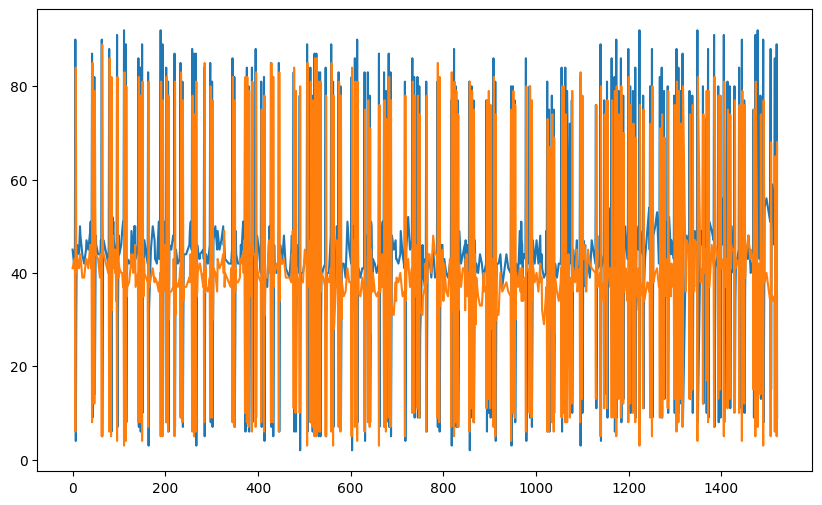

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Clinton"])
plt.plot(df.index, df["Trump"])

In [29]:
df

,Pollster,Start Date,Number of Observations,Mode,Trump,Clinton
0,Insights West,2016-11-04,940.0,Internet,41.0,45.0
4,IBD/TIPP,2016-11-04,1107.0,Live Phone,43.0,41.0
5,YouGov/Economist,2016-11-04,3669.0,Internet,41.0,45.0
6,YouGov/Economist,2016-11-04,1392.0,Internet,6.0,90.0
7,YouGov/Economist,2016-11-04,1110.0,Internet,84.0,4.0
...,...,...,...,...,...,...
1516,YouGov/Economist,2015-06-20,235.0,Internet,65.0,12.0
1517,YouGov/Economist,2015-06-20,266.0,Internet,34.0,45.0
1518,Quinnipiac,2015-05-19,1711.0,Live Phone,32.0,50.0
1519,Quinnipiac,2015-05-19,748.0,Live Phone,5.0,89.0


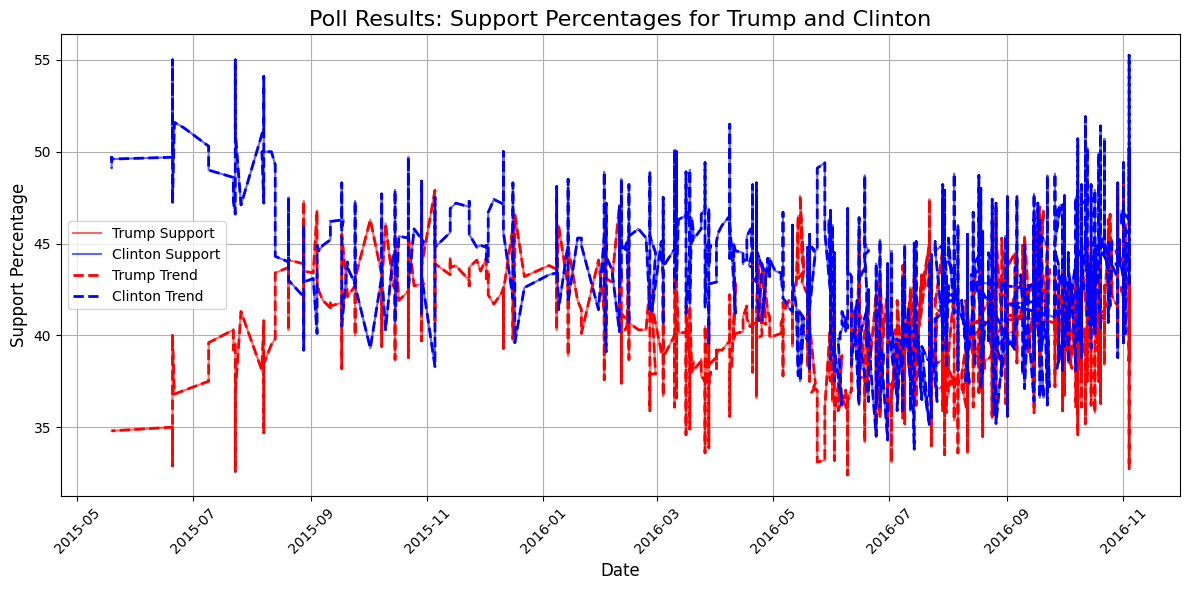

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

df['Start Date'] = pd.to_datetime(df['Start Date'])
df.set_index('Start Date', inplace=True)

# Calculate a rolling average for Trump and Clinton support (adjust window as needed)
df['Trump'] = df['Trump'].rolling(window=10, min_periods=1).mean()
df['Clinton'] = df['Clinton'].rolling(window=10, min_periods=1).mean()

# Plot the poll results with smooth trend lines
plt.figure(figsize=(12, 6))

# Plot original data points
plt.plot(df.index, df['Trump'], label="Trump Support", color='red', alpha=0.6, linewidth=1.5)
plt.plot(df.index, df['Clinton'], label="Clinton Support", color='blue', alpha=0.6, linewidth=1.5)

# Plot the rolling average trend lines
plt.plot(df.index, df['Trump'], label="Trump Trend", color='red', linestyle='--', linewidth=2)
plt.plot(df.index, df['Clinton'], label="Clinton Trend", color='blue', linestyle='--', linewidth=2)

# Title and labels
plt.title("Poll Results: Support Percentages for Trump and Clinton", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Support Percentage", fontsize=12)

# Show legend
plt.legend()

# Format x-axis with date labels for readability
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


# Question 5

In [31]:
# total number of voters

total_voters = int(sum(original_df["Number of Observations"]))

total_voters

1940931

# Question 6

In [32]:
average

,0
Trump,40.403751
Clinton,43.537019
Other,5.079688
Undecided,9.948927


the values in table are in percentage

# Question 7

In [33]:
############## Trump ###############

p_hat = float(average.iloc[0] / 100)

N = total_voters

min_of_interval = p_hat - 1.96 * np.sqrt( ( (1-p_hat) * p_hat ) / N )

max_of_interval = p_hat + 1.96 * np.sqrt( ( (1-p_hat) * p_hat ) / N )

<ipython-input-33-883dd3a2e116>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p_hat = float(average.iloc[0] / 100)


In [34]:
print(f"95% confidence interval for Trump: ({min_of_interval}, {max_of_interval})")

95% confidence interval for Trump: (0.4033471591599, 0.4047278655192708)


In [35]:
############## Clinton ###############

p_hat = float(average.iloc[1] / 100)

N = total_voters

min_of_interval = p_hat - 1.96 * np.sqrt( ( (1-p_hat) * p_hat ) / N )

max_of_interval = p_hat + 1.96 * np.sqrt( ( (1-p_hat) * p_hat ) / N )

<ipython-input-35-2cb653ca1c6b>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p_hat = float(average.iloc[1] / 100)


In [36]:
print(f"95% confidence interval for Clinton: ({min_of_interval}, {max_of_interval})")

95% confidence interval for Clinton: (0.4346726585602699, 0.436067716563126)


# Question 8

In [37]:
# clinton p_hat
p_hat = float(average.iloc[1] / 100)
N = total_voters

SE = np.sqrt( ( p_hat * (1-p_hat) ) / N )

<ipython-input-37-d3ced0b6e388>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p_hat = float(average.iloc[1] / 100)


In [38]:
# CI for 2d
upper_ci = ( 2 * p_hat - 1 ) + 1.96 * 2 * SE

lower_ci = ( 2 * p_hat - 1 ) - 1.96 * 2 * SE

print(f"95% confidence interval for 2d: ({lower_ci}, {upper_ci})")

95% confidence interval for 2d: (-0.13065468287946025, -0.12786456687374803)


In [39]:
# Re-importing necessary libraries due to environment reset
from scipy import stats

# Calculate the sample mean (midpoint of CI) and margin of error (half of the CI width)
mean_d = (lower_ci + upper_ci) / 2
margin_of_error = (upper_ci - lower_ci) / 2

# Standard error based on 95% CI (z = 1.96 for 95% confidence)
z_score = 1.96
standard_error = margin_of_error / z_score

# Calculate the t-statistic for H0: d = 0
t_statistic = mean_d / standard_error

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(t_statistic)))

# Display results
mean_d, standard_error, t_statistic, p_value

(-0.12925962487660414, 0.0007117642871714841, -181.6045384775843, 0.0)

Since the p-value is extremely close to zero, we strongly reject the null hypothesis.

This indicates that the spread 𝑑 is significantly different from zero.